In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)

In [5]:
# Training Dataset
x_train=train_datagen.flow_from_directory('C:/Users/minec/Desktop/IBM PROJECT/Dataset/training_set',target_size=(64,64), class_mode='categorical',batch_size=900)
# Testing Dataset
x_test=test_datagen.flow_from_directory('C:/Users/minec/Desktop/IBM PROJECT/Dataset/test_set',target_size=(64,64), class_mode='categorical',batch_size=900)

Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [6]:
# let img1 be an image with no features
img1 = np.array([np.array([200, 200]), np.array([200, 200])])
img2 = np.array([np.array([200, 200]), np.array([0, 0])])
img3 = np.array([np.array([200, 0]), np.array([200, 0])])
  
kernel_horizontal = np.array([np.array([2, 2]), np.array([-2, -2])])
print(kernel_horizontal, 'is a kernel for detecting horizontal edges')
  
kernel_vertical = np.array([np.array([2, -2]), np.array([2, -2])])
print(kernel_vertical, 'is a kernel for detecting vertical edges')

[[ 2  2]
 [-2 -2]] is a kernel for detecting horizontal edges
[[ 2 -2]
 [ 2 -2]] is a kernel for detecting vertical edges


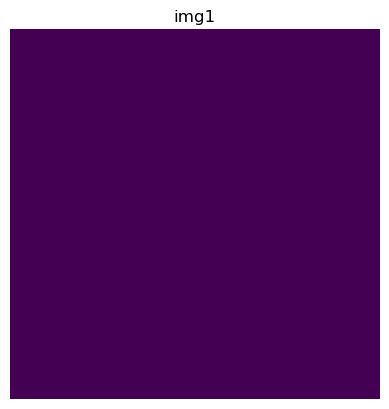

Horizontal edge confidence score: 0
Vertical edge confidence score: 0


In [7]:
# We will apply the kernels on the images by
# elementwise multiplication followed by summation
def apply_kernel(img, kernel):
    return np.sum(np.multiply(img, kernel))
  
# Visualizing img1
plt.imshow(img1)
plt.axis('off')
plt.title('img1')
plt.show()

# Checking for horizontal and vertical features in image1
print('Horizontal edge confidence score:', apply_kernel(img1, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img1, 
                                            kernel_vertical))

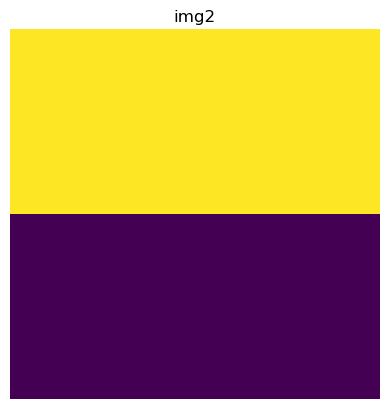

Horizontal edge confidence score: 800
Vertical edge confidence score: 0


In [8]:
# Visualizing img2
plt.imshow(img2)
plt.axis('off')
plt.title('img2')
plt.show()

# Checking for horizontal and vertical features in image2
print('Horizontal edge confidence score:', apply_kernel(img2, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img2, 
                                            kernel_vertical))

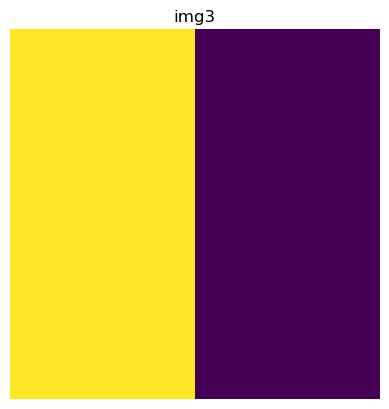

Horizontal edge confidence score: 0
Vertical edge confidence score: 800


In [9]:
# Visualizing img3
plt.imshow(img3)
plt.axis('off')
plt.title('img3')
plt.show()
  
# Checking for horizontal and vertical features in image3
print('Horizontal edge confidence score:', apply_kernel(img3, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img3, 
                                            kernel_vertical))

In [10]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  18
Len x-test :  3


In [11]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [12]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [13]:
# Creating Model
model=Sequential()

In [14]:
# Adding Layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))